# Evaluation of the models

**Comparison of all models**:
- Logistic Regression
- Random Forest
- Support Vector Machine with RBF kernel
- Deep Neural Network (Multilayer Perceptron)

## 0 Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, recall_score, matthews_corrcoef, accuracy_score
from sklearn.model_selection import train_test_split

In [9]:
data = pd.read_csv("../dat/dips/DIPS_Data_cleaned.csv", sep = ",", low_memory = False)
data_change = pd.read_csv("../dat/dips/DIPS_Data_cleaned_change.csv", sep = ",", low_memory = False)

In [10]:
# weights
weights_lr_unreg = pd.read_csv("../exp/weights/weights_lr_unreg.csv", sep = ",")
weights_lr_lasso = pd.read_csv("../exp/weights/weights_lr_lasso.csv", sep = ",")
weights_rf = pd.read_csv("../exp/weights/weights_rf.csv", sep = ",")
weights_svc = pd.read_csv("../exp/weights/weights_svc.csv", sep = ",")
weights_dnn = pd.read_csv("../exp/weights/weights_dnn.csv", sep = ",")

In [11]:
# predictions
y_pred_lr_unreg = pd.read_csv("../exp/predictions/y_pred_lr_unreg.csv", sep = ",")
y_pred_lr_lasso = pd.read_csv("../exp/predictions/y_pred_lr_lasso.csv", sep = ",")
y_pred_rf = pd.read_csv("../exp/predictions/y_pred_rf.csv", sep = ",")
y_pred_svc = pd.read_csv("../exp/predictions/y_pred_svc.csv", sep = ",")
y_pred_dnn = pd.read_csv("../exp/predictions/y_pred_dnn.csv", sep = ",")
y_pred_knn = pd.read_csv("../exp/predictions/y_pred_knn.csv", sep = ",")

# 1 Metrics

In [12]:
# Predictors
X = data_change
X = X.drop(["hpi"], axis = 1)

# Target
y = data_change["hpi"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train shape: ", X_train.shape, round(X_train.shape[0]/len(X), 2), "\n",
      "X_test shape: ", X_test.shape, round(X_test.shape[0]/len(X), 2),  "\n",
      "y_train shape: ", y_train.shape, round(y_train.shape[0]/len(y), 2), "\n",
      "y_test shape: ", y_test.shape, round(y_test.shape[0]/len(y), 2), "\n")

X_train shape:  (983, 22) 0.8 
 X_test shape:  (246, 22) 0.2 
 y_train shape:  (983,) 0.8 
 y_test shape:  (246,) 0.2 



In [13]:
# calculate metrics for all models
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    macro_f1 = recall_score(y_test, y_pred, average = "macro")
    micro_f1 = recall_score(y_test, y_pred, average = "micro")
    mcc = matthews_corrcoef(y_test, y_pred)

    cm = confusion_matrix(y_test, y_pred)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

    # dictionary with all metrics
    metrics = {
        "accuracy": accuracy,
        "macro_f1": macro_f1,
        "micro_f1": micro_f1,
        "mcc": mcc,
        "precision": precision,
        "recall": recall
    }

    return metrics

In [14]:
# calculate metrics for all models
metrics_lr_unreg = calculate_metrics(y_test, y_pred_lr_unreg)
metrics_lr_lasso = calculate_metrics(y_test, y_pred_lr_lasso)
metrics_rf = calculate_metrics(y_test, y_pred_rf)
metrics_svc = calculate_metrics(y_test, y_pred_svc)
metrics_dnn = calculate_metrics(y_test, y_pred_dnn)
metrics_knn = calculate_metrics(y_test, y_pred_knn)

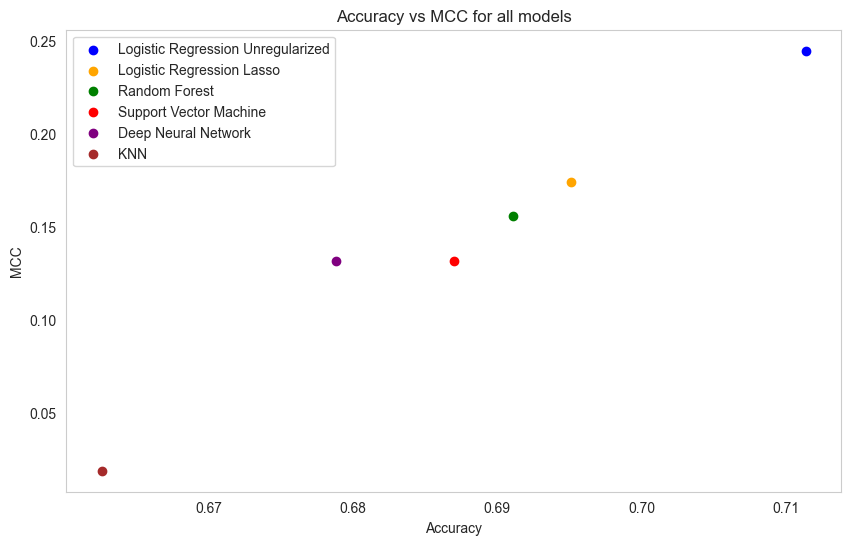

In [15]:
# plot accuracy (x-axis) and mcc (y-axis) for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr_unreg["accuracy"], metrics_lr_unreg["mcc"], label = "Logistic Regression Unregularized", color = "blue")
plt.scatter(metrics_lr_lasso["accuracy"], metrics_lr_lasso["mcc"], label = "Logistic Regression Lasso", color = "orange")
plt.scatter(metrics_rf["accuracy"], metrics_rf["mcc"], label = "Random Forest", color = "green")
plt.scatter(metrics_svc["accuracy"], metrics_svc["mcc"], label = "Support Vector Machine", color = "red")
plt.scatter(metrics_dnn["accuracy"], metrics_dnn["mcc"], label = "Deep Neural Network", color = "purple")
plt.scatter(metrics_knn["accuracy"], metrics_knn["mcc"], label = "KNN", color = "brown")
plt.xlabel("Accuracy")
plt.ylabel("MCC")
plt.title("Accuracy vs MCC for all models")
plt.legend()
plt.grid()
plt.show()

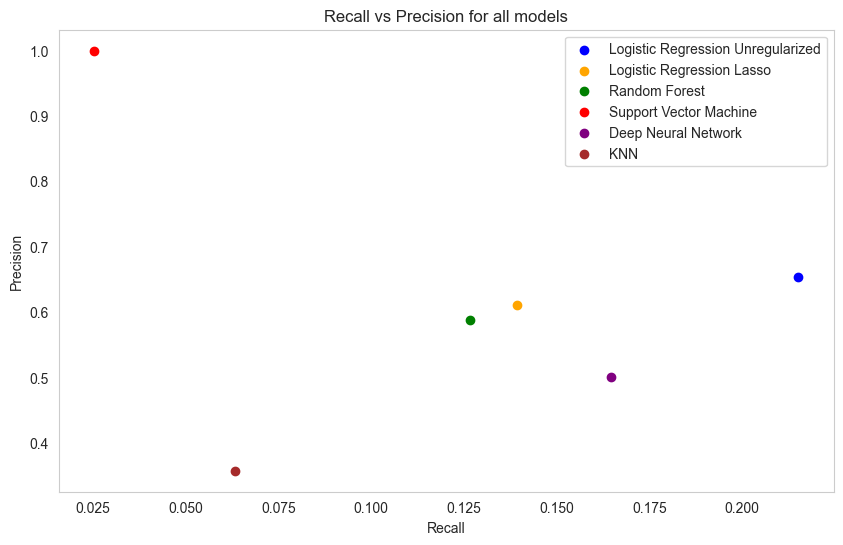

In [16]:
# plot recall vs precision for all models
plt.figure(figsize = (10, 6))
plt.scatter(metrics_lr_unreg["recall"], metrics_lr_unreg["precision"], label = "Logistic Regression Unregularized", color = "blue")
plt.scatter(metrics_lr_lasso["recall"], metrics_lr_lasso["precision"], label = "Logistic Regression Lasso", color = "orange")
plt.scatter(metrics_rf["recall"], metrics_rf["precision"], label = "Random Forest", color = "green")
plt.scatter(metrics_svc["recall"], metrics_svc["precision"], label = "Support Vector Machine", color = "red")
plt.scatter(metrics_dnn["recall"], metrics_dnn["precision"], label = "Deep Neural Network", color = "purple")
plt.scatter(metrics_knn["recall"], metrics_knn["precision"], label = "KNN", color = "brown")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Recall vs Precision for all models")
plt.legend()
plt.grid()
plt.show()

# 2 Feature importance